## Imports

In [1]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import config
np.random.seed(config.SEED)

# read data
df = pd.read_csv(config.DATA_CSV)
# create index. {contest}{problem} format
df.index = df["contest"].astype(str)+df["problem_name"]
# keep only problem_statement, tags
df = df[["problem_statement","problem_tags"]]
df.columns = ["problem_statement","tags"]

df = df.dropna(axis=0)
display(df.describe())
display(df.tail())
display(df.info())

,problem_statement,tags
count,8272,8272
unique,6766,4786
top,The Smart Beaver from ABBYY came up with anoth...,"implementation,*800"
freq,20,109


,problem_statement,tags
1271B,There are $$$n$$$ blocks arranged in a row and...,"greedy,math,*1300"
1271C,The map of the capital of Berland can be viewe...,"bruteforce,geometry,greedy,implementation,*1300"
1271D,"You play a strategic video game (yeah, we ran ...","datastructures,dp,greedy,implementation,sortin..."
1271E,"At first, let's define function $$$f(x)$$$ as ...","binarysearch,combinatorics,dp,math,*2100"
1271F,Recently a lot of students were enrolled in Be...,"bruteforce,*2700"


<class 'pandas.core.frame.DataFrame'>
Index: 8272 entries, 325A to 1271F
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   problem_statement  8272 non-null   object
 1   tags               8272 non-null   object
dtypes: object(2)
memory usage: 193.9+ KB


None

## problem_statement

In [2]:
df["problem_statement"].describe()

count                                                  8272
unique                                                 6766
top       The Smart Beaver from ABBYY came up with anoth...
freq                                                     20
Name: problem_statement, dtype: object

In [3]:
from preprocess import preprocess_text

text = df.loc["100A","problem_statement"]
print(preprocess_text(text))
print(df.loc["100A","tags"])

df["problem_statement"] = \
    df["problem_statement"].apply(lambda x:preprocess_text(str(x)))

df["problem_statement"]

input length n1soroush celebr area complet consist soroush completelyth bought number side squar allow cover fine rotat put site sorush contest persian carpet three write 100th befor yes want singl room favorit integ onli
*specialproblem,implementation,*1100


325A     xcoordin parallel edg top two one touch yes pr...
325B     would possibl initi one game print line format...
325C     way possibl initi posit pie finit two one prin...
325D     way would consist share formal seaon possibl i...
325E     red order exact consist chang ani button circu...
                               ...                        
1271B    consist possibl white string arrang posit itth...
1271C    class consist street possibl infinit tent para...
1271D    way scorein yeah formal paramet later afterwar...
1271E    frac formal question text two process find pri...
1271F    class consist possibl educ skip enrol subject ...
Name: problem_statement, Length: 8272, dtype: object

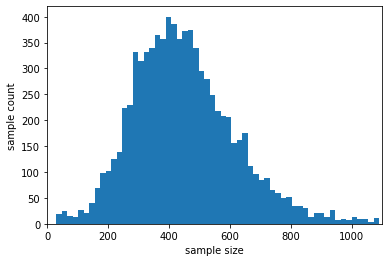

In [4]:
# historgram on text data size
samples = df["problem_statement"].values
plt.hist([len(str(s)) for s in samples], 100)
plt.xlim(0,1100)
plt.xlabel("sample size")
plt.ylabel("sample count")
plt.show()

In [5]:
# drop any problems not 100<=len<=1000
for idx in df.index:
    l = len(str(df.loc[idx,"problem_statement"]))
    if not 100<=l<=1000: df.drop(index=idx, inplace=True)

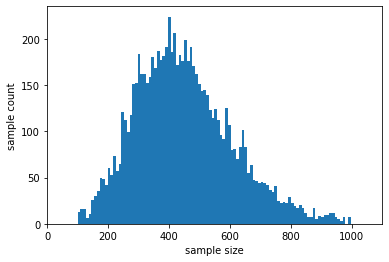

In [6]:
# historgram on text data size
samples = df["problem_statement"].values
plt.hist([len(str(s)) for s in samples], 100)
plt.xlim(0,1100)
plt.xlabel("sample size")
plt.ylabel("sample count")
plt.show()

In [7]:
df.describe()

,problem_statement,tags
count,8126,8126
unique,6625,4740
top,identifi name text setprint train inform physi...,"implementation,*800"
freq,20,108


## Tags

In [8]:
df["tags"].describe()

count                    8126
unique                   4740
top       implementation,*800
freq                      108
Name: tags, dtype: object

In [9]:
from preprocess import clean_tags_column
df["tags"]=df["tags"].apply(clean_tags_column)
df = df[df.tags.str.len()>=1]
df.tail()

,problem_statement,tags
1271B,consist possibl white string arrang posit itth...,"[greedy, math]"
1271C,class consist street possibl infinit tent para...,"[bruteforce, geometry, greedy, implementation]"
1271D,way scorein yeah formal paramet later afterwar...,"[datastructures, dp, greedy, implementation, s..."
1271E,frac formal question text two process find pri...,"[binarysearch, combinatorics, dp, math]"
1271F,class consist possibl educ skip enrol subject ...,[bruteforce]


implementation            2201
math                      1995
greedy                    1937
dp                        1667
datastructures            1287
constructivealgorithms    1166
bruteforce                1163
graphs                     895
binarysearch               779
sortings                   756
Name: tags, dtype: int64


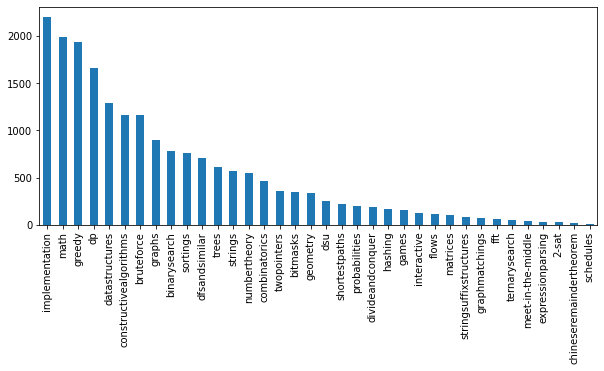

In [10]:
# tag stats
tag_stats = df["tags"].explode().value_counts()
tag_stats.plot(kind="bar", figsize=(10,4))
print(tag_stats.head(10))

In [11]:
df.tail()

,problem_statement,tags
1271B,consist possibl white string arrang posit itth...,"[greedy, math]"
1271C,class consist street possibl infinit tent para...,"[bruteforce, geometry, greedy, implementation]"
1271D,way scorein yeah formal paramet later afterwar...,"[datastructures, dp, greedy, implementation, s..."
1271E,frac formal question text two process find pri...,"[binarysearch, combinatorics, dp, math]"
1271F,class consist possibl educ skip enrol subject ...,[bruteforce]


## 특정 태그들에 대해서만 EDA

In [12]:
new_tags = ["implementation","math","greedy","dp","datastructures","bruteforce",
            "graphs","strings","dfsandsimilar","trees","geometry"]

new_df = pd.DataFrame(index=df.index,
                columns=["problem_statement"]+new_tags)

for idx in new_df.index:
    new_df.loc[idx,"problem_statement"] = df.loc[idx,"problem_statement"]
    for tag in new_tags:
        if tag in df.loc[idx,"tags"]:
            new_df.loc[idx,tag] = 1
        else: 
            new_df.loc[idx,tag] = 0
new_df.tail()

,problem_statement,implementation,math,greedy,dp,datastructures,bruteforce,graphs,strings,dfsandsimilar,trees,geometry
1271B,consist possibl white string arrang posit itth...,0,1,1,0,0,0,0,0,0,0,0
1271C,class consist street possibl infinit tent para...,1,0,1,0,0,1,0,0,0,0,1
1271D,way scorein yeah formal paramet later afterwar...,1,0,1,1,1,0,0,0,0,0,0
1271E,frac formal question text two process find pri...,0,1,0,1,0,0,0,0,0,0,0
1271F,class consist possibl educ skip enrol subject ...,0,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:>

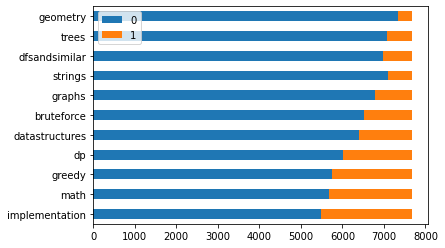

In [13]:
barplot_df = pd.DataFrame(index=new_tags, columns=['0','1'])
for tag in new_tags:
    barplot_df.loc[tag,"0"] = list(new_df.loc[:,tag]).count(0)
    barplot_df.loc[tag,"1"] = list(new_df.loc[:,tag]).count(1)
barplot_df.plot.barh(stacked=True)

## Train test split

In [14]:
# train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    new_df, test_size=0.2, random_state=config.SEED)
print(train.shape, test.shape)

train.to_pickle(config.TRAIN)
test.to_pickle(config.TEST)
train.tail()

(6143, 12) (1536, 12)


,problem_statement,implementation,math,greedy,dp,datastructures,bruteforce,graphs,strings,dfsandsimilar,trees,geometry
1034D,length exact second union calcul help getfor s...,0,0,0,0,1,0,0,0,0,0,0
1166D,valid hold consist possibl satisfi posit itth ...,0,1,1,0,0,1,0,0,0,0,0
786A,element case endsimilar possibl initi arrang i...,0,0,0,1,0,0,0,0,1,0,0
914F,typeal lettersth case consist string initi pro...,0,0,0,0,1,1,0,1,0,0,0
766A,consist charactersif name string mahmoud appea...,0,0,0,0,0,0,0,1,0,0,0
